In [3]:
import pandas as pd

file_path = 'Train_v1.txt'
column_names = ['toRemove', 'is_sarcastic', 'text']

#read the dataset
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names)


In [4]:
# Display the first few rows of the DataFrame
print(df.head())

# Get information about the DataFrame, including data types and missing values
print(df.info())

# Generate descriptive statistics for numerical columns
print(df.describe())


   toRemove  is_sarcastic                                               text
0  TrainSen             0  @0430yes i hope youre lurking rn. i want to li...
1  TrainSen             0  05 really taught me a valuable lesson I'm neve...
2  TrainSen             0  @098BERRY Never had a voice to protest, so you...
3  TrainSen             0  @0hMySt4rs Rest in peace & love to you and you...
4  TrainSen             0  100 days until Christmas! 🌲 #too soon #not rea...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39780 entries, 0 to 39779
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   toRemove      39780 non-null  object
 1   is_sarcastic  39780 non-null  int64 
 2   text          39780 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.5+ KB
None
       is_sarcastic
count  39780.000000
mean       0.464756
std        0.498763
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max

In [6]:
# Check the distribution of labels
print(df['is_sarcastic'].value_counts())

is_sarcastic
0    21292
1    18488
Name: count, dtype: int64


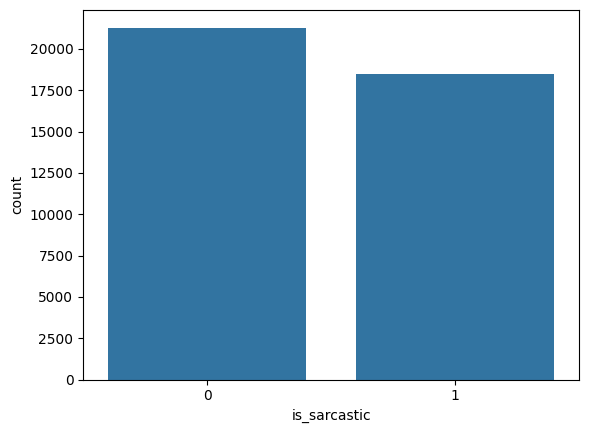

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels
sns.countplot(x='is_sarcastic', data=df)
plt.show()


0    @0430yes i hope youre lurking rn. i want to li...
1    05 really taught me a valuable lesson I'm neve...
2    @098BERRY Never had a voice to protest, so you...
3    @0hMySt4rs Rest in peace & love to you and you...
4    100 days until Christmas! 🌲 #too soon #not rea...
Name: text, dtype: object


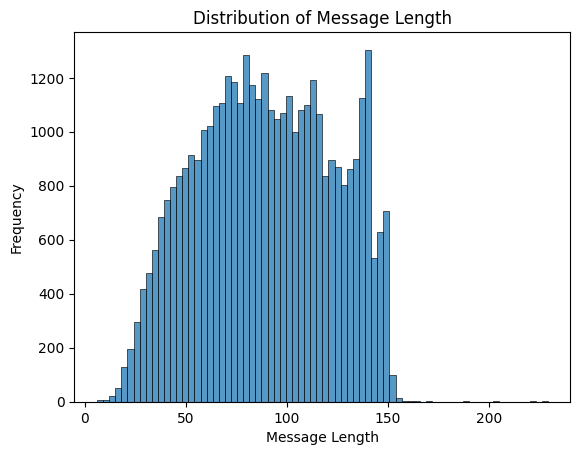

In [8]:
# Display some example messages
print(df['text'].head())

# Calculate the length of each message
df['message_length'] = df['text'].apply(len)

# Visualize the distribution of message lengths
sns.histplot(df['message_length'])
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Distribution of Message Length')
plt.show()


In [9]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Remove punctuation
df['message_clean'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Convert text to lowercase
df['message_clean'] = df['message_clean'].str.lower()

# Tokenize the text
df['tokens'] = df['message_clean'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


In [10]:
from collections import Counter

# Create separate DataFrames for sarcastic and non-sarcastic messages
sarcastic_df = df[df['is_sarcastic'] == 1]
non_sarcastic_df = df[df['is_sarcastic'] == 0]

# Count word frequencies in sarcastic messages
sarcastic_word_counts = Counter(word for sublist in sarcastic_df['tokens'] for word in sublist)

# Count word frequencies in non-sarcastic messages
non_sarcastic_word_counts = Counter(word for sublist in non_sarcastic_df['tokens'] for word in sublist)

# Display most common words in sarcastic messages
print("Most common words in sarcastic messages:")
print(sarcastic_word_counts.most_common(10))

# Display most common words in non-sarcastic messages
print("Most common words in non-sarcastic messages:")
print(non_sarcastic_word_counts.most_common(10))


Most common words in sarcastic messages:
[('sarcasm', 18545), ('love', 2487), ('im', 2223), ('like', 2086), ('dont', 1463), ('rt', 1321), ('get', 1268), ('people', 1220), ('day', 1064), ('one', 876)]
Most common words in non-sarcastic messages:
[('love', 2360), ('im', 2142), ('like', 1499), ('dont', 1493), ('day', 1292), ('get', 1167), ('😂', 1070), ('good', 1050), ('great', 990), ('people', 942)]


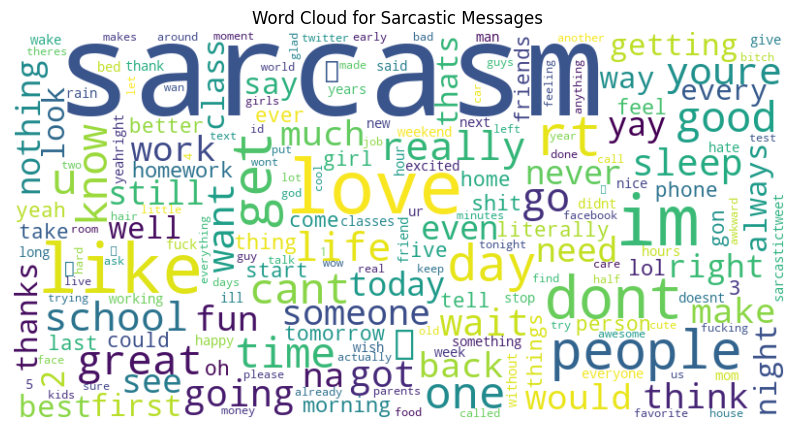

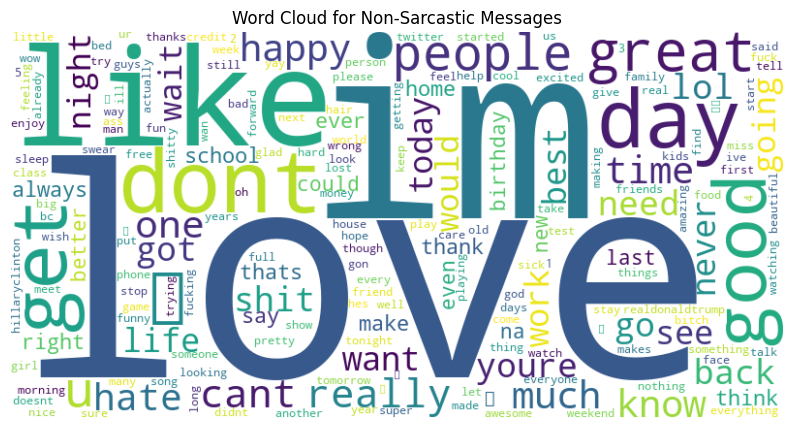

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for sarcastic messages
sarcastic_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sarcastic_word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(sarcastic_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Sarcastic Messages')
plt.axis('off')
plt.show()

# Generate word cloud for non-sarcastic messages
non_sarcastic_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(non_sarcastic_word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(non_sarcastic_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Non-Sarcastic Messages')
plt.axis('off')
plt.show()
